In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score
import scipy.cluster.hierarchy as sch

# Set plot style
sns.set(style="whitegrid")

try:
    # We use the full, scaled training data for clustering
    X_train = pd.read_csv('../data/processed/X_train.csv')
    # We also load the target variable to compare against our clusters later
    y_train = pd.read_csv('../data/processed/y_train.csv').values.ravel()

    # Drop the 'id' column if it exists
    if 'id' in X_train.columns:
        X_train = X_train.drop('id', axis=1)

    print("Processed training data loaded successfully!")
    print("X_train shape:", X_train.shape)
except FileNotFoundError:
    print("Error: Processed data not found.")

Processed training data loaded successfully!
X_train shape: (736, 21)


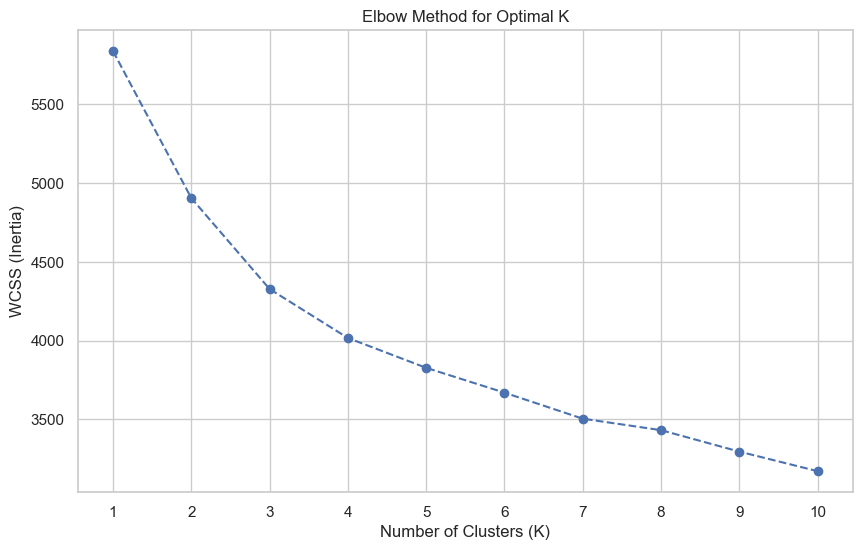

In [2]:
# Find the optimal number of clusters using the Elbow Method
wcss = []  # Within-Cluster Sum of Squares
cluster_range = range(1, 11)

for k in cluster_range:
    kmeans = KMeans(n_clusters=k, init='k-means++', n_init='auto', random_state=42)
    kmeans.fit(X_train)
    wcss.append(kmeans.inertia_)

# Plot the Elbow Method graph
plt.figure(figsize=(10, 6))
plt.plot(cluster_range, wcss, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS (Inertia)')
plt.xticks(cluster_range)
plt.grid(True)
plt.show()

In [3]:
# Set the optimal number of clusters from the elbow plot
OPTIMAL_K = 3

# Initialize and fit the final K-Means model
kmeans = KMeans(n_clusters=OPTIMAL_K, init='k-means++', n_init='auto', random_state=42)
cluster_labels = kmeans.fit_predict(X_train)

# Add the cluster labels to our training dataframe for analysis
X_train_clustered = X_train.copy()
X_train_clustered['cluster'] = cluster_labels

print(f"K-Means clustering complete with K={OPTIMAL_K}.")
print("\nNumber of patients in each cluster:")
print(X_train_clustered['cluster'].value_counts())

K-Means clustering complete with K=3.

Number of patients in each cluster:
cluster
0    324
2    280
1    132
Name: count, dtype: int64


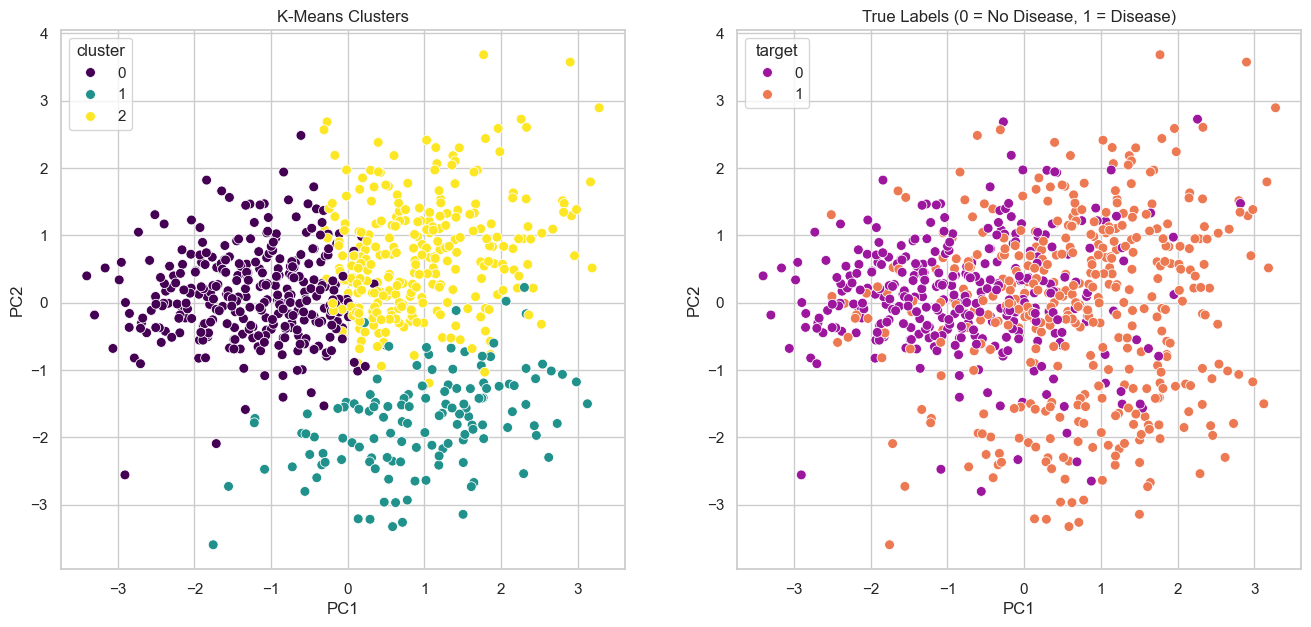

In [5]:
from sklearn.decomposition import PCA # <-- Add this import statement

# Use PCA to reduce the data to 2 dimensions for visualization
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)

# Create a new DataFrame for plotting
df_plot = pd.DataFrame(X_train_pca, columns=['PC1', 'PC2'])
df_plot['cluster'] = cluster_labels # From the previous cell
df_plot['target'] = y_train # The actual heart disease label

# Create side-by-side plots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 7))

# Plot 1: K-Means Clusters
sns.scatterplot(data=df_plot, x='PC1', y='PC2', hue='cluster', palette='viridis', ax=ax1, s=50)
ax1.set_title('K-Means Clusters')

# Plot 2: True Labels (Heart Disease)
sns.scatterplot(data=df_plot, x='PC1', y='PC2', hue='target', palette='plasma', ax=ax2, s=50)
ax2.set_title('True Labels (0 = No Disease, 1 = Disease)')

plt.show()

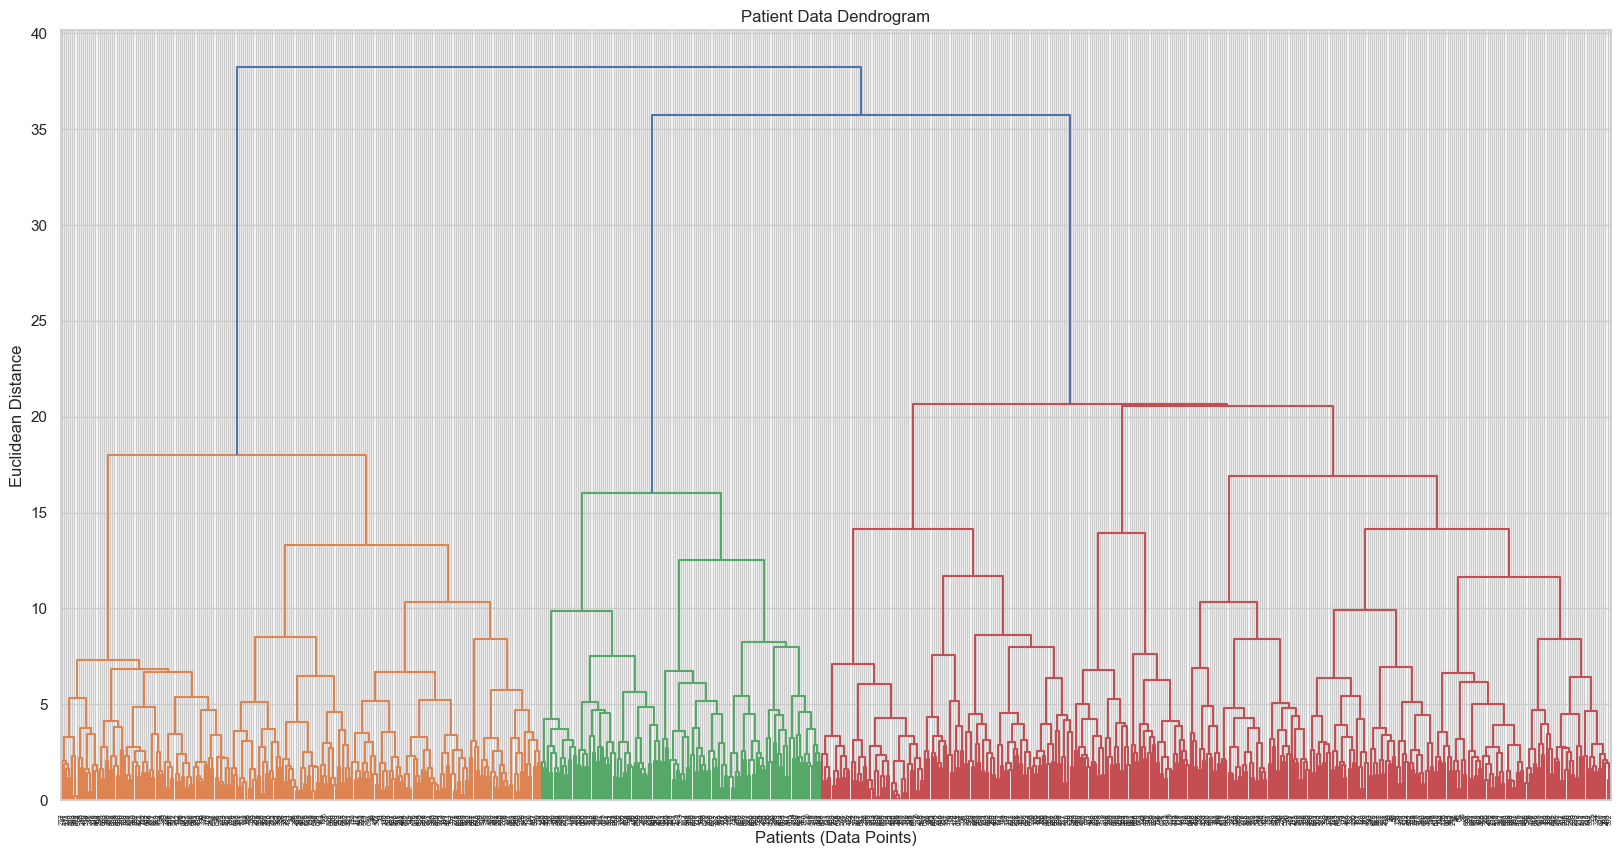

In [6]:
import scipy.cluster.hierarchy as sch

# Create the dendrogram
plt.figure(figsize=(20, 10))
plt.title('Patient Data Dendrogram')

# We use the 'ward' method which minimizes variance in each cluster
dendrogram = sch.dendrogram(sch.linkage(X_train, method='ward'))

plt.xlabel('Patients (Data Points)')
plt.ylabel('Euclidean Distance')
plt.show()

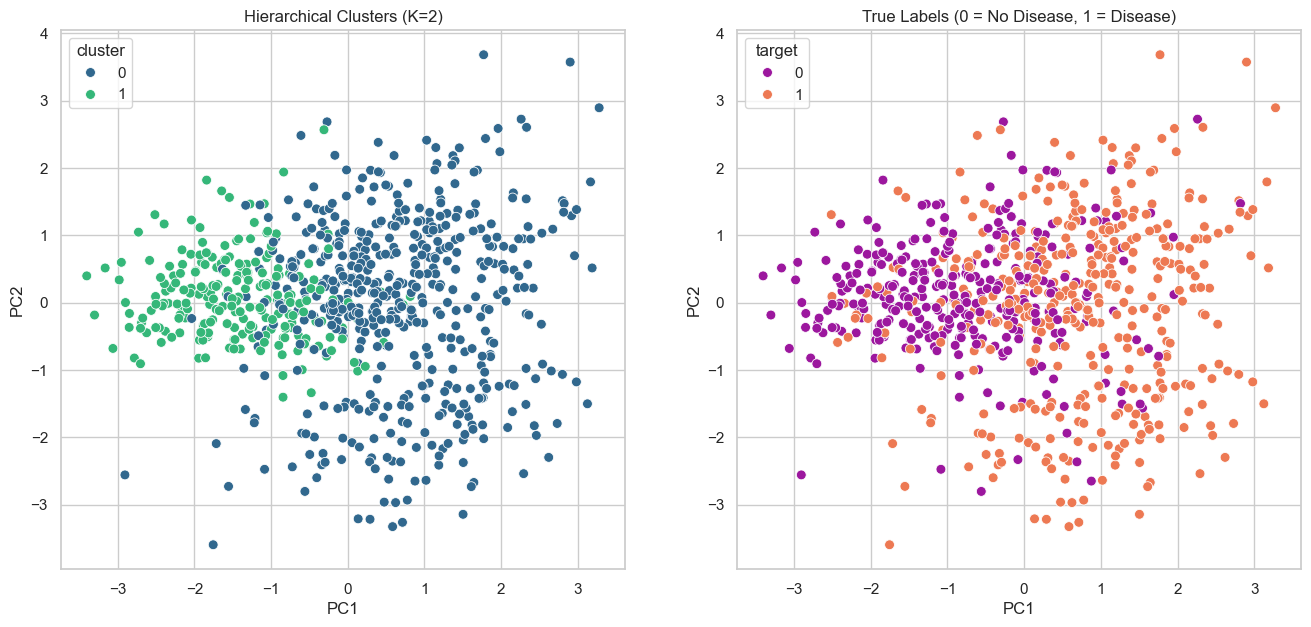

In [7]:
# Initialize and fit the Hierarchical Clustering model
# We use n_clusters=2 based on our dendrogram analysis
hc = AgglomerativeClustering(n_clusters=2)
hc_cluster_labels = hc.fit_predict(X_train)

# --- Visualize the results (similar to K-Means) ---

# Use PCA to reduce the data to 2 dimensions for visualization
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)

# Create a new DataFrame for plotting
df_plot_hc = pd.DataFrame(X_train_pca, columns=['PC1', 'PC2'])
df_plot_hc['cluster'] = hc_cluster_labels
df_plot_hc['target'] = y_train

# Create side-by-side plots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 7))

# Plot 1: Hierarchical Clusters
sns.scatterplot(data=df_plot_hc, x='PC1', y='PC2', hue='cluster', palette='viridis', ax=ax1, s=50)
ax1.set_title('Hierarchical Clusters (K=2)')

# Plot 2: True Labels (Heart Disease)
sns.scatterplot(data=df_plot_hc, x='PC1', y='PC2', hue='target', palette='plasma', ax=ax2, s=50)
ax2.set_title('True Labels (0 = No Disease, 1 = Disease)')

plt.show()